# 2. Jianfeng Zhaoa etc, "Speech emotion recognition using deep 1D & 2D CNN LSTM networks", Jan, 2019,


https://www.sciencedirect.com/science/article/pii/S1746809418302337

- Conv1D layer -> LSTM

# import

In [56]:
from emotion_recognition import utils
from emotion_recognition import features

import numpy as np

import tensorflow as tf
import keras
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential
from keras import regularizers

import warnings

warnings.filterwarnings(action='ignore') 

## 1.1 Data preparation
- min_length = 34510
- max_length = 222302

- Setting parameters

In [57]:
window_size = 1000 # 특징 추출을 위한 윈도우 크기
class_size = 4 #class 크기
sr = 16000

# 0 = neutral, 1 = anger, 2 = happiness, 3 = sadness
emotion = ["neutral","anger","happiness","sadness"]

- Loading filelist 

In [58]:
# 파일 이름 읽어오기
path = "../data/"
text_filename = "filelist_wav.txt"

filelist_wav = []
emotionlist = []

f = open(path+text_filename, 'r')

while True:
    line = f.readline()
    if not line: break
    
    filename, label = line.split()
    
    filelist_wav.append(filename)
    emotionlist.append(label)
    
f.close()

- Splitting the data into trainnnig and test
- For test, subjects 1,6,7,11 
- For training, subjects 2,3,4,5,8,9,10,12,13,14,15,16,17,18,19,20

In [59]:
Training_filename = []
Training_emotionlist = []
Test_filename = []
Test_emotionlist = []

for i in range(len(filelist_wav)):
    if (filelist_wav[i].split("_")[0][1:] == '1'):
        Test_filename.append(filelist_wav[i])
        Test_emotionlist.append(emotionlist[i])
    elif (filelist_wav[i].split("_")[0][1:] == '6'):
        Test_filename.append(filelist_wav[i])
        Test_emotionlist.append(emotionlist[i])
    elif (filelist_wav[i].split("_")[0][1:] == '7'):
        Test_filename.append(filelist_wav[i])
        Test_emotionlist.append(emotionlist[i])
    elif (filelist_wav[i].split("_")[0][1:] == '11'):
        Test_filename.append(filelist_wav[i])
        Test_emotionlist.append(emotionlist[i])
    else:
        Training_filename.append(filelist_wav[i])
        Training_emotionlist.append(emotionlist[i])

In [60]:
print (np.shape(Training_filename))
print (np.shape(Test_filename))

(614,)
(226,)


- dd

In [61]:
Training_vector = []
Training_label = []

for ix in range(len(Training_filename)):
    # 파일 읽어오기
    if Training_emotionlist[ix] == "excitement":
        continue
        
    if Training_emotionlist[ix] == "fear":
        continue
    
    print (str(ix)+ "\t" + Training_emotionlist[ix] + "\t" + path+'wav/' + Training_filename[ix])
    
    y,sr = utils.loadwav(path+'wav/' + Training_filename[ix])
    
    temp = emotion.index(Training_emotionlist[ix])    
    label = np.zeros(class_size)
    label[temp] = 1
    
    #파일 전체 길이
    length = len(y)
    
    for i in range(0, length-window_size, int(window_size/3)):
        y_sub = y[i:i+window_size]
            
        Training_vector.append(y_sub)
        Training_label.append(label)

0	sadness	../data/wav/s19_sadness_M_s17.wav
1	sadness	../data/wav/s18_sadness_F_s1.wav
4	anger	../data/wav/s15_anger_F_a11.wav
6	sadness	../data/wav/s19_sadness_M_s8.wav
8	neutral	../data/wav/s18_neutral_F_n14.wav
9	sadness	../data/wav/s20_sadness_F_s20.wav
11	happiness	../data/wav/s3_happiness_M_h10.wav
13	happiness	../data/wav/s5_happiness_M_h8.wav
14	sadness	../data/wav/s8_sadness_M_s17.wav
15	happiness	../data/wav/s5_happiness_M_h16.wav
16	happiness	../data/wav/s4_happiness_M_h10.wav
17	neutral	../data/wav/s9_neutral_M_n10.wav
20	anger	../data/wav/s19_anger_M_a18.wav
21	neutral	../data/wav/s15_neutral_F_n11.wav
22	anger	../data/wav/s14_anger_M_a17.wav
23	neutral	../data/wav/s12_neutral_F_n5.wav
24	neutral	../data/wav/s15_neutral_F_n16.wav
25	happiness	../data/wav/s19_happiness_M_h7.wav
28	happiness	../data/wav/s10_happiness_M_h10.wav
29	happiness	../data/wav/s20_happiness_F_h8.wav
30	happiness	../data/wav/s19_happiness_M_h8.wav
31	sadness	../data/wav/s12_sadness_F_s12.wav
32	neutra

282	happiness	../data/wav/s19_happiness_M_h9.wav
284	neutral	../data/wav/s9_neutral_M_n13.wav
285	happiness	../data/wav/s12_happiness_F_h4.wav
287	anger	../data/wav/s13_anger_F_a12.wav
288	happiness	../data/wav/s10_happiness_M_h14.wav
289	happiness	../data/wav/s2_happiness_M_h18.wav
290	neutral	../data/wav/s19_neutral_M_n13.wav
291	neutral	../data/wav/s13_neutral_F_n13.wav
292	sadness	../data/wav/s15_sadness_F_s5.wav
294	anger	../data/wav/s5_anger_M_a8.wav
296	sadness	../data/wav/s4_sadness_M_s18.wav
298	sadness	../data/wav/s4_sadness_M_s17.wav
299	sadness	../data/wav/s9_sadness_M_s1.wav
301	sadness	../data/wav/s10_sadness_M_s12.wav
302	happiness	../data/wav/s8_happiness_M_h5.wav
303	anger	../data/wav/s15_anger_F_a17.wav
304	neutral	../data/wav/s12_neutral_F_n12.wav
305	sadness	../data/wav/s15_sadness_F_s15.wav
306	anger	../data/wav/s15_anger_F_a16.wav
307	neutral	../data/wav/s14_neutral_M_n20.wav
308	neutral	../data/wav/s14_neutral_M_n13.wav
311	neutral	../data/wav/s9_neutral_M_n2.wav

553	neutral	../data/wav/s18_neutral_F_n9.wav
554	happiness	../data/wav/s15_happiness_F_h13.wav
559	happiness	../data/wav/s3_happiness_M_h1.wav
560	sadness	../data/wav/s9_sadness_M_s19.wav
561	neutral	../data/wav/s12_neutral_F_n8.wav
563	sadness	../data/wav/s2_sadness_M_s18.wav
564	happiness	../data/wav/s9_happiness_M_h16.wav
565	anger	../data/wav/s9_anger_M_a11.wav
566	neutral	../data/wav/s3_neutral_M_n16.wav
567	anger	../data/wav/s19_anger_M_a19.wav
568	sadness	../data/wav/s13_sadness_F_s5.wav
569	sadness	../data/wav/s13_sadness_F_s12.wav
574	sadness	../data/wav/s18_sadness_F_s17.wav
576	neutral	../data/wav/s14_neutral_M_n14.wav
577	happiness	../data/wav/s9_happiness_M_h4.wav
580	neutral	../data/wav/s3_neutral_M_n8.wav
582	happiness	../data/wav/s12_happiness_F_h12.wav
583	sadness	../data/wav/s10_sadness_M_s17.wav
585	sadness	../data/wav/s19_sadness_M_s2.wav
586	sadness	../data/wav/s17_sadness_M_s16.wav
588	anger	../data/wav/s18_anger_F_a16.wav
589	sadness	../data/wav/s4_sadness_M_s14.

In [62]:
Test_vector = []
Test_label = []

for ix in range(len(Test_filename)):
    # 파일 읽어오기
    if Test_emotionlist[ix] == "excitement":
        continue
        
    if Test_emotionlist[ix] == "fear":
        continue
    
    print (str(ix)+ "\t" + Test_emotionlist[ix] + "\t" + path+'wav/' + Test_filename[ix])
    
    y,sr = utils.loadwav(path+'wav/' + Test_filename[ix])
    
    temp = emotion.index(Test_emotionlist[ix])    
    label = np.zeros(class_size)
    label[temp] = 1
    
    #파일 전체 길이
    length = len(y)
    
    for i in range(0, length-window_size, int(window_size/3)):
        y_sub = y[i:i+window_size]
            
        Test_vector.append(y_sub)
        Test_label.append(label)

1	sadness	../data/wav/s7_sadness_M_s1.wav
2	happiness	../data/wav/s11_happiness_F_h20.wav
3	sadness	../data/wav/s11_sadness_F_s1.wav
4	sadness	../data/wav/s11_sadness_F_s9.wav
9	neutral	../data/wav/s1_neutral_M_n20.wav
10	sadness	../data/wav/s6_sadness_F_s18.wav
11	anger	../data/wav/s1_anger_M_a4.wav
13	happiness	../data/wav/s6_happiness_F_h14.wav
14	happiness	../data/wav/s11_happiness_F_h15.wav
16	anger	../data/wav/s6_anger_F_a12.wav
18	sadness	../data/wav/s11_sadness_F_s17.wav
19	happiness	../data/wav/s6_happiness_F_h1.wav
21	sadness	../data/wav/s6_sadness_F_s10.wav
24	happiness	../data/wav/s6_happiness_F_h15.wav
26	neutral	../data/wav/s6_neutral_F_n15.wav
27	sadness	../data/wav/s7_sadness_M_s15.wav
28	happiness	../data/wav/s6_happiness_F_h4.wav
29	sadness	../data/wav/s7_sadness_M_s11.wav
30	sadness	../data/wav/s6_sadness_F_s12.wav
31	anger	../data/wav/s7_anger_M_a17.wav
32	neutral	../data/wav/s1_neutral_M_n13.wav
33	anger	../data/wav/s11_anger_F_a16.wav
34	sadness	../data/wav/s7_sad

In [63]:
print (np.shape(Training_vector), np.shape(Test_vector))

(111810, 1000) (49809, 1000)


In [64]:
import math

for i in range(len(Training_vector)):
    Training_vector[i] = Training_vector[i] * 2 / math.pow(2,16)
    
for i in range(len(Test_vector)):
    Test_vector[i] = Test_vector[i] * 2 / math.pow(2,16)

In [65]:
Training_vector = np.expand_dims(Training_vector,axis=2)
Test_vector = np.expand_dims(Test_vector,axis=2)

In [66]:
print (np.shape(Training_vector), np.shape(Test_vector))

(111810, 1000, 1) (49809, 1000, 1)


In [67]:
X_train = np.array(Training_vector)
Y_train = np.array(Training_label)
X_test = np.array(Test_vector)
Y_test = np.array(Test_label)

In [68]:
random_index = np.arange(np.shape(X_train)[0])
np.random.shuffle(random_index)

In [69]:
X_train = X_train[random_index]
Y_train = Y_train[random_index]

In [70]:
print (np.shape(X_train), np.shape(X_test))

(111810, 1000, 1) (49809, 1000, 1)


In [71]:
print (np.shape(Y_train), np.shape(Y_test))

(111810, 4) (49809, 4)


In [72]:
model_m = Sequential()
model_m.add(layers.Conv1D(64, 3, padding='same', input_shape=(window_size, 1))) #1 LFLB1
model_m.add(layers.MaxPooling1D(pool_size=4, strides =4))
model_m.add(layers.Conv1D(64, 3, padding='same', input_shape=(window_size, 1))) #1 LFLB2
model_m.add(layers.MaxPooling1D(pool_size=4, strides =4))
model_m.add(layers.Conv1D(128, 3, padding='same', input_shape=(window_size, 1))) #1 LFLB3
model_m.add(layers.MaxPooling1D(pool_size=4, strides =4))
model_m.add(layers.Conv1D(128, 3, padding='same', input_shape=(window_size, 1))) #1 LFLB4
model_m.add(layers.MaxPooling1D(pool_size=4, strides =4))
model_m.add(layers.LSTM(256, input_shape = (132, 128)))
model_m.add(layers.Dense(class_size, activation='softmax'))
print(model_m.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_13 (Conv1D)           (None, 1000, 64)          256       
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 250, 64)           0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 250, 64)           12352     
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 62, 64)            0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 62, 128)           24704     
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 15, 128)           0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 15, 128)          

In [73]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]

model_m.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

BATCH_SIZE = 200
EPOCHS = 100

history = model_m.fit(X_train,
                      Y_train,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      validation_data=(X_test,Y_test),
                      verbose=1)

Train on 111810 samples, validate on 49809 samples
Epoch 1/100
111810/111810 [==============================] - 129s 1ms/step - loss: 1.0698 - accuracy: 0.5025 - val_loss: 1.0586 - val_accuracy: 0.5368
Epoch 2/100
111810/111810 [==============================] - 128s 1ms/step - loss: 0.8953 - accuracy: 0.5958 - val_loss: 1.0845 - val_accuracy: 0.5227
Epoch 3/100
111810/111810 [==============================] - 128s 1ms/step - loss: 0.8422 - accuracy: 0.6239 - val_loss: 1.2302 - val_accuracy: 0.4659
Epoch 4/100
111810/111810 [==============================] - 128s 1ms/step - loss: 0.8069 - accuracy: 0.6406 - val_loss: 1.0675 - val_accuracy: 0.5209
Epoch 5/100
111810/111810 [==============================] - 128s 1ms/step - loss: 0.7801 - accuracy: 0.6540 - val_loss: 1.0973 - val_accuracy: 0.5101
Epoch 6/100
111810/111810 [==============================] - 129s 1ms/step - loss: 0.7559 - accuracy: 0.6644 - val_loss: 1.0934 - val_accuracy: 0.5084
Epoch 7/100
111810/111810 [================

KeyboardInterrupt: 

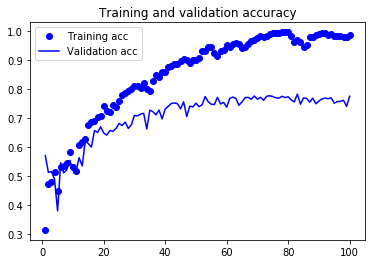

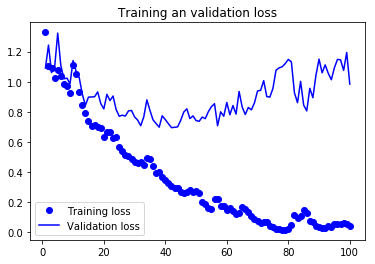

In [20]:
import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs= range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss,'b',label = 'Validation loss')
plt.title('Training an validation loss')
plt.legend()

plt.show()

In [21]:
acc =model_m.evaluate(X_test,Y_test)

1088/1088 [==============================] - 9s 8ms/step


In [22]:
print (acc[1])

0.7748161764705882
